# I. Lý thuyết

1) Tại sao mô hình R-CNN lại có tốc độ xử lý chậm?

A. Do R-CNN sử dụng các backbone rất nặng.

B. Do các vùng region proposal được dự báo bounding box và phân loại nhãn một cách độc lập.

C. Do thuật toán Selective Search là một phương pháp heuristic nên rất chậm 

D. Do mô hình tách biệt giữa dự báo bounding box và phân loại nhãn

Chọn C


2) Chỉ số mAP trong các thuật toán object detection được tính toán theo cách nào ?

A. Tính toán chỉ số AP trên từng category: Sắp xếp các Prediction Boxes của một category theo điểm số xác suất giảm dần. Thực hiện matching các Prediction Box với Ground Truth Box sao cho nếu IoU > 0.5 thì được xem là positive và trái lại là negative. Nếu Positive thì Precision sẽ có tử và mẫu cùng tăng lên 1 trong khi Recall có tử số tăng lên 1. Nếu Negative thì Precision có tử giữ nguyên và mẫu tăng lên 1 trong khi Recall không thay đổi. mAP bằng trung bình AP của toàn bộ các category.

B. Tính toán chỉ số AP trên từng category: Sắp xếp các Prediction Boxes của một category theo điểm số xác suất giảm dần. Thực hiện matching các Prediction Box với Ground Truth Box sao cho nếu IoU > 0.5 thì được xem là positive và trái lại là negative. Nếu Positive thì Precision sẽ có tử số tăng lên 1 và mẫu giữ nguyên trong khi Recall có tử số tăng lên 1. Nếu Negative thì Precision có tử giữ nguyên và mẫu tăng lên 1 trong khi Recall không thay đổi. mAP bằng trung bình AP của toàn bộ các category.

C. Tính toán chỉ số AP trên từng category: Sắp xếp các Prediction Boxes của một category theo điểm số xác suất giảm dần. Thực hiện matching các Prediction Box với Ground Truth Box sao cho nếu IoU > 0.5 thì được xem là positive và trái lại là negative. Nếu Positive thì Precision sẽ có tử và mẫu cùng tăng lên 1 trong khi Recall có tử giữ nguyên lên 1. Nếu Negative thì Precision có tử giữ nguyên và mẫu tăng lên 1 trong khi Recall không thay đổi. mAP bằng trung bình AP của toàn bộ các category.

D. Tính toán chỉ số AP trên từng category: Sắp xếp các Prediction Boxes của một category theo điểm số xác suất giảm dần. Thực hiện matching các Prediction Box với Ground Truth Box sao cho nếu IoU > 0.5 thì được xem là positive và trái lại là negative. Nếu Positive thì Precision sẽ có tử và mẫu cùng tăng lên 1 trong khi Recall có tử số tăng lên 1. Nếu Negative thì Precision có tử giữ nguyên và mẫu tăng lên 1 trong khi Recall không thay đổi. Tính AP = diện tích dưới đường cong Precion Recall. mAP bằng trung bình AP của toàn bộ các category.

Chọn D

3) Phương pháp Non Max Suppression sẽ làm gì để giảm thiểu số lượng các bounding box ?

A. Dựa vào mức độ overlapping giữa các bounding box để loại bỏ những bounding box có mức độ chồng lấn nhau lớn.

B. Dựa vào mức độ overlapping giữa các bounding box để loại bỏ những bounding box có mức độ chồng lấn nhau nhỏ.

C. Dựa vào diện tích để loại bỏ các bounding box nhỏ dưới một ngưỡng cho trước.

D. Dựa vào mức độ overlapping để giữ lại một bounding box có điểm số cao hơn nếu chúng chồng lấn nhau lớn.

Chọn D

4) Trong mô hình Fast R-CNN chúng ta thêm một nhánh mạng RPN có tác dụng gì?

A. Dự báo ra các vùng Region of Interest có khả năng cao chứa vật thể.

B. Dự báo xác xuất cho toàn bộ các pixel nằm trên feature map.
 
C. Dự báo bounding box và nhãn cho các vùng Region of Interest có khả năng cao chứa vật thể.

D. Điều chỉnh lại kích thước của các bounding box từ anchor box.

Chọn C

5) Anchor Box là gì?

A. Là những hình chữ nhật giúp xác định vị trí của vật thể

B. Là những hình chữ nhật với kích thước xác định trước gắn liền với một pixel để làm cơ sở điều chỉnh phần bù (offset) của các tọa độ nhằm dự báo bounding box.

C. Là những hình chữ nhật phác thảo hình dạng của bounding box cần dự báo.

D. Là hình chữ nhật gắn liền với một pixel để làm cơ sở dự báo bounding box.

Chọn C

# II. Thực hành 




##6) Xây dựng hàm tính toán IoU giữa hai bounding box.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [ ]:
def get_iou(boxes_preds, boxes_labels):

    box1_x1 = boxes_preds[0]
    box1_y1 = boxes_preds[1]
    box1_x2 = boxes_preds[2] + box1_x1
    box1_y2 = boxes_preds[3] + box1_y1

    box2_x1 = boxes_labels[0]
    box2_y1 = boxes_labels[1]
    box2_x2 = boxes_labels[2] + box2_x1
    box2_y2 = boxes_labels[3] + box2_y1

    x1 = max(box1_x1, box2_x1)
    y1 = max(box1_y1, box2_y1)

    x2 = min(box1_x2, box2_x2)
    y2 = min(box1_y2, box2_y2)

    if(box2_x1 > box1_x2 and box2_y1 > box1_y2): return 0,(x1+x2)/2,(y1+y2)/2

    intersection = abs((x2 - x1) * (y2 - y1))
    box1_area = abs((box1_x2 - box1_x1) * (box1_y2 - box1_y1))
    box2_area = abs((box2_x2 - box2_x1) * (box2_y2 - box2_y1))

    iou = intersection / (box1_area + box2_area - intersection + 1e-6)

    return iou

In [ ]:
# top left : x, y, w, h. 
bbox1 = [2,10,5,5]
bbox2 = [1,7,5,5]
iou_value = get_iou(bbox1,bbox2)
print(iou_value)

0.1904761859410432


In [ ]:
#Show in (x_left_bottom, y_left_bottom),width,height. I just convert the coordinate to draw the plot.
bbox1 = [(2, 5),5,5]
bbox2 = [(1, 2),5,5]
(x1_left_bottom, y1_left_bottom),width1,height1 = bbox1
(x2_left_bottom, y2_left_bottom),width2,height2 = bbox2

<Figure size 720x720 with 0 Axes>

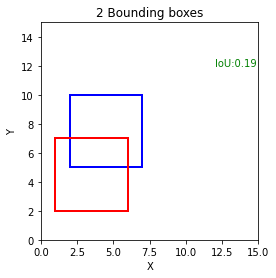

In [ ]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
plt.xlim(0, 15)
plt.ylim(0, 15)
ax.add_patch(Rectangle((x1_left_bottom, y1_left_bottom),width1,height1,linewidth=2,facecolor='none',edgecolor = 'blue'))
ax.add_patch(Rectangle((x2_left_bottom, y2_left_bottom),width2,height2,linewidth=2,facecolor='none',edgecolor = 'red'))
ax.text(12, 12, "IoU:" + str(round(iou_value, 2)),color='green')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2 Bounding boxes")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

##7) Các câu bên dưới qui ước chung bounding box đều có tọa độ là (x, y, w, h) lần lượt tương ứng với (x, y) là điểm top-left và (w, h) là kích thước chiều rộng và cao.

Giả sử các bounding box dự báo cho một category (class) có tọa độ lần lượt là:

[10, 10, 50, 20], [15, 15, 55, 25], [50, 20, 20, 25], [20, 50, 20, 50], [30, 20, 10, 10]

Các bounding box ground truth lần lượt là:

[10, 10, 45, 25], [45, 20, 20, 25], [30, 25, 10, 10]

Hãy thực hiện vẽ đường cong Precision Recall curve và xây dựng thuật toán tính giá trị AP.

In [ ]:
import matplotlib.pyplot as plt
pre_boxes=[[10, 10, 50, 20], [15, 15, 55, 25], [50, 20, 20, 25], [20, 50, 20, 50], [30, 20, 10, 10]]
ground_boxes=[[10, 10, 45, 25], [45, 20, 20, 25], [30, 25, 10, 10]]

In [ ]:
total_positive_samples = 0
positive_samples = 0
prec_his = []
rec_his = []
for box in pre_boxes:
  total_positive_samples += 1
  for gth in ground_boxes:
    iou = get_iou(box,gth)
    if (iou >= 0.5):
      positive_samples += 1
      break
  precision = positive_samples / total_positive_samples
  recall = positive_samples/len(ground_boxes)

  prec_his.append(precision)
  rec_his.append(recall)

print(prec_his)
print(rec_his)

[1.0, 0.5, 0.6666666666666666, 0.5, 0.4]
[0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


Text(0.5, 1.0, 'Precision Recal Curve')

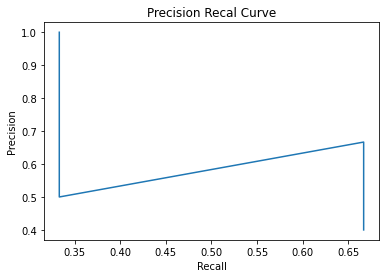

In [ ]:
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(rec_his, prec_his)
plt.title('Precision Recal Curve')

In [ ]:
def caculate_ap(rec, prec):
    """
    --- Official matlab code VOC2012---
    mrec=[0 ; rec ; 1];
    mpre=[0 ; prec ; 0];
    for i=numel(mpre)-1:-1:1
            mpre(i)=max(mpre(i),mpre(i+1));
    end
    i=find(mrec(2:end)~=mrec(1:end-1))+1;
    ap=sum((mrec(i)-mrec(i-1)).*mpre(i));
    """
    rec.insert(0, 0.0) # insert 0.0 at begining of list
    rec.append(1.0) # insert 1.0 at end of list
    mrec = rec[:]
    prec.insert(0, 0.0) # insert 0.0 at begining of list
    prec.append(0.0) # insert 0.0 at end of list
    mpre = prec[:]
    """
     This part makes the precision monotonically decreasing
        (goes from the end to the beginning)
        matlab:  for i=numel(mpre)-1:-1:1
                                mpre(i)=max(mpre(i),mpre(i+1));
    """
    # matlab indexes start in 1 but python in 0, so I have to do:
    #   range(start=(len(mpre) - 2), end=0, step=-1)
    # also the python function range excludes the end, resulting in:
    #   range(start=(len(mpre) - 2), end=-1, step=-1)
    for i in range(len(mpre)-2, -1, -1):
        mpre[i] = max(mpre[i], mpre[i+1])
    """
     This part creates a list of indexes where the recall changes
        matlab:  i=find(mrec(2:end)~=mrec(1:end-1))+1;
    """
    i_list = []
    for i in range(1, len(mrec)):
        if mrec[i] != mrec[i-1]:
            i_list.append(i) # if it was matlab would be i + 1
    """
     The Average Precision (AP) is the area under the curve
        (numerical integration)
        matlab: ap=sum((mrec(i)-mrec(i-1)).*mpre(i));
    """
    ap = 0.0
    for i in i_list:
        ap += ((mrec[i]-mrec[i-1])*mpre[i])
    return ap

In [ ]:
ap = caculate_ap(rec_his, prec_his)
print(ap)

0.5555555555555556


In [ ]:
###Caculate mAP for n-class: caculate average AP for n class

##8) Thực hiện visualize các anchor box có tỷ lệ aspect ratio (tỷ lệ width/height) lần lượt là 1, 2, 1/2 trên một feature map kích thước 20 x 20

In [ ]:
!pip install d2l

In [ ]:
%cd /content/drive/MyDrive/AI/Deeplearning_course/Week 7

/content/drive/MyDrive/AI/Deeplearning_course/Week 7


In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

torch.set_printoptions(2)  # Simplify printing accuracy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def multibox_prior(data, sizes, ratios):
    """Generate anchor boxes with different shapes centered on each pixel."""
    in_height, in_width = data.shape[-2:]
    device, num_sizes, num_ratios = data.device, len(sizes), len(ratios)
    boxes_per_pixel = (num_sizes + num_ratios - 1)
    size_tensor = torch.tensor(sizes, device=device)
    ratio_tensor = torch.tensor(ratios, device=device)
    # Offsets are required to move the anchor to the center of a pixel. Since
    # a pixel has height=1 and width=1, we choose to offset our centers by 0.5
    offset_h, offset_w = 0.5, 0.5
    steps_h = 1.0 / in_height  # Scaled steps in y axis
    steps_w = 1.0 / in_width  # Scaled steps in x axis

    # Generate all center points for the anchor boxes
    center_h = (torch.arange(in_height, device=device) + offset_h) * steps_h
    center_w = (torch.arange(in_width, device=device) + offset_w) * steps_w
    shift_y, shift_x = torch.meshgrid(center_h, center_w)
    shift_y, shift_x = shift_y.reshape(-1), shift_x.reshape(-1)

    # Generate `boxes_per_pixel` number of heights and widths that are later
    # used to create anchor box corner coordinates (xmin, xmax, ymin, ymax)
    w = torch.cat((size_tensor * torch.sqrt(ratio_tensor[0]),
                   sizes[0] * torch.sqrt(ratio_tensor[1:])))\
                   * in_height / in_width  # Handle rectangular inputs
    h = torch.cat((size_tensor / torch.sqrt(ratio_tensor[0]),
                   sizes[0] / torch.sqrt(ratio_tensor[1:])))
    # Divide by 2 to get half height and half width
    anchor_manipulations = torch.stack((-w, -h, w, h)).T.repeat(
                                        in_height * in_width, 1) / 2

    # Each center point will have `boxes_per_pixel` number of anchor boxes, so
    # generate a grid of all anchor box centers with `boxes_per_pixel` repeats
    out_grid = torch.stack([shift_x, shift_y, shift_x, shift_y],
                dim=1).repeat_interleave(boxes_per_pixel, dim=0)
    output = out_grid + anchor_manipulations
    return output.unsqueeze(0)

In [ ]:
img = d2l.plt.imread('./cute_cat.jpg')
h, w = img.shape[:2]

print(h, w)
X = torch.rand(size=(1, 3, h, w))  # Construct input data
Y = multibox_prior(X, sizes=[0.5,0.5, 0.5,], ratios=[1, 2, 0.5])
Y.shape

681 700


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([1, 2383500, 4])

In [ ]:
boxes = Y.reshape(h, w, 5, 4)
boxes[250, 250, 0, :]

tensor([0.11, 0.12, 0.60, 0.62])

In [ ]:
def show_bboxes(axes, bboxes, labels=None, colors=None):
    """Show bounding boxes."""

    def make_list(obj, default_values=None):
        if obj is None:
            obj = default_values
        elif not isinstance(obj, (list, tuple)):
            obj = [obj]
        return obj

    labels = make_list(labels)
    colors = make_list(colors, ['b', 'g', 'r', 'm', 'c'])
    for i, bbox in enumerate(bboxes):
        color = colors[i % len(colors)]
        rect = d2l.bbox_to_rect(bbox.detach().numpy(), color)
        axes.add_patch(rect)
        if labels and len(labels) > i:
            text_color = 'k' if color == 'w' else 'w'
            axes.text(rect.xy[0], rect.xy[1], labels[i],
                      va='center', ha='center', fontsize=9, color=text_color,
                      bbox=dict(facecolor=color, lw=0))

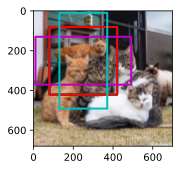

In [ ]:
d2l.set_figsize()
bbox_scale = torch.tensor((w, h, w, h))
fig = d2l.plt.imshow(img)
show_bboxes(fig.axes, boxes[250, 250, :, :] * bbox_scale)

##9) Từ bộ dữ liệu [Vinbigdata-chest-xray](https://www.kaggle.com/c/vinbigdata-chest-xray-abnormalities-detection/data) bao gồm các tọa độ bounding box của 14 nhãn của các loại bệnh khác nhau được chuẩn đoán trên ảnh chụp chest X-ray. Thực hiện biến đổi file dữ liệu train.csv sang định dạng COCO json format. Chi tiết mô tả về dữ liệu bạn đọc ở tab data link trên.



##10) Hãy xây dựng thuật toán object detection để  hỗ trợ bác sĩ chuẩn đoán bệnh. Để không phải download dữ liệu, bạn nên run một notebook trên kaggle và trích dẫn link sang bài làm của bạn.